In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymysql
from scipy.stats import pearsonr

In [ ]:
sql_query_modbus = 'select * from modbus_data'
sql_query_mqtt = 'select * from mqtt_data'

conn = pymysql.connect(
    host='192.168.71.213',
    user='root',
    password='P@ssw0rd',
    db='IOT'
)

try:
    cursor = conn.cursor()
    cursor.execute(sql_query_modbus)
    result = cursor.fetchall()
    cursor.execute(sql_query_mqtt)
    result1 = cursor.fetchall()
except Exception as e:
    print(e)
finally:
    conn.close()

In [353]:
df_modbus = pd.DataFrame(result)
df_modbus.count()

0    1573
1    1573
2    1573
3    1573
dtype: int64

In [354]:
df_mqtt = pd.DataFrame(result1)
df_mqtt.count()

0    974
1    974
2    974
3    974
4    974
5    974
dtype: int64

In [355]:
df_mqtt.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [356]:
df_modbus.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [357]:
df_modbus.head()

,0,1,2,3
0,125,type,1.00,2024-12-17 20:42:06
1,126,current,0.27,2024-12-17 20:42:06
2,127,W,7.00,2024-12-17 20:42:07
3,128,VAR,1.00,2024-12-17 20:42:07
4,129,VAR,57.00,2024-12-17 20:42:07


In [358]:
# 컬럼 이름 변경
df_modbus.rename(columns={0: 'modbus_id', 1: 'modbus_name', 2: 'value', 3: 'timestamp'}, inplace=True)
df_modbus.head()

,modbus_id,modbus_name,value,timestamp
0,125,type,1.00,2024-12-17 20:42:06
1,126,current,0.27,2024-12-17 20:42:06
2,127,W,7.00,2024-12-17 20:42:07
3,128,VAR,1.00,2024-12-17 20:42:07
4,129,VAR,57.00,2024-12-17 20:42:07


In [359]:
df_mqtt.rename(columns={0: 'mqtt_id', 1: 'measurement', 2: 'place', 3: 'spot', 4:'value', 5:'timestamp'}, inplace=True)
df_mqtt.head()

,mqtt_id,measurement,place,spot,value,timestamp
0,1,temperature,storage,입구,18.5,2024-12-17 19:04:11
1,2,humidity,storage,입구,23.0,2024-12-17 19:04:11
2,3,temperature,hive,정수기 위,25.0,2024-12-17 19:04:19
3,4,battery,hive,정수기 위,1.0,2024-12-17 19:04:19
4,5,humidity,hive,정수기 위,20.5,2024-12-17 19:04:19


In [360]:
df_modbus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   modbus_id    1573 non-null   int64  
 1   modbus_name  1573 non-null   object 
 2   value        1573 non-null   float64
 3   timestamp    1573 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 49.3+ KB


In [361]:
df_modbus['modbus_name'].unique()

array(['type', 'current', 'W', 'VAR', 'VA', 'PF average', 'I THD average',
       'V1', 'I1', 'phase', 'power factor', 'I1 THD', 'current unbalance',
       'volt unbalance'], dtype=object)

In [362]:
df_mqtt['measurement'].unique()

array(['temperature', 'humidity', 'battery', 'distance', 'occupancy',
       'co2', 'pressure', 'voltage', 'battery_level', 'di', 'infrared',
       'tvoc', 'activity', 'illumination', 'infrared_and_visible'],
      dtype=object)

In [363]:
mqtt_occupancy = df_mqtt[df_mqtt['measurement'] == 'occupancy']
mqtt_battery = df_mqtt[df_mqtt['measurement'] == 'battery']
mqtt_distance = df_mqtt[df_mqtt['measurement'] == 'distance']
mqtt_voltage = df_mqtt[df_mqtt['measurement'] == 'voltage']
mqtt_temperature = df_mqtt[df_mqtt['measurement'] == 'temperature']
mqtt_humidity = df_mqtt[df_mqtt['measurement'] == 'humidity']
mqtt_co2 = df_mqtt[df_mqtt['measurement'] == 'co2']
mqtt_tvoc = df_mqtt[df_mqtt['measurement'] == 'tvoc']
mqtt_illumination = df_mqtt[df_mqtt['measurement'] == 'illumination']
mqtt_infrared = df_mqtt[df_mqtt['measurement'] == 'infrared']

In [364]:
modbus_type = df_modbus[df_modbus['modbus_name'] == 'type']
modbus_current = df_modbus[df_modbus['modbus_name'] == 'current']
modbus_W = df_modbus[df_modbus['modbus_name'] == 'W']
modbus_VAR = df_modbus[df_modbus['modbus_name'] == 'VAR']
modbus_VA = df_modbus[df_modbus['modbus_name'] == 'VA']

In [365]:
modbus_type.head()

,modbus_id,modbus_name,value,timestamp
0,125,type,1.0,2024-12-17 20:42:06
17,142,type,2.0,2024-12-17 20:42:13
34,159,type,3.0,2024-12-17 20:42:19
51,176,type,1.0,2024-12-17 20:42:25
53,178,type,2.0,2024-12-17 20:42:31


In [366]:
modbus_current.head()   # 전류(양)

,modbus_id,modbus_name,value,timestamp
1,126,current,0.27,2024-12-17 20:42:06
18,143,current,0.14,2024-12-17 20:42:13
35,160,current,2.13,2024-12-17 20:42:19
56,181,current,1.23,2024-12-17 20:42:37
73,198,current,0.33,2024-12-17 20:42:44


In [367]:
modbus_W.head()     # 전력(에너지의 흐름 속도 측정)

,modbus_id,modbus_name,value,timestamp
2,127,W,7.0,2024-12-17 20:42:07
10,135,W,7.0,2024-12-17 20:42:07
19,144,W,4.0,2024-12-17 20:42:13
27,152,W,4.0,2024-12-17 20:42:13
36,161,W,405.0,2024-12-17 20:42:19


In [368]:
modbus_VAR.head()   # 무효 전력

,modbus_id,modbus_name,value,timestamp
3,128,VAR,1.0,2024-12-17 20:42:07
4,129,VAR,57.0,2024-12-17 20:42:07
11,136,VAR,1.0,2024-12-17 20:42:07
12,137,VAR,57.0,2024-12-17 20:42:07
20,145,VAR,1.0,2024-12-17 20:42:13


In [369]:
modbus_VA.head()    # 전체 전력

,modbus_id,modbus_name,value,timestamp
5,130,VA,60.0,2024-12-17 20:42:07
13,138,VA,60.0,2024-12-17 20:42:07
22,147,VA,33.0,2024-12-17 20:42:13
30,155,VA,33.0,2024-12-17 20:42:13
39,164,VA,470.0,2024-12-17 20:42:19


### IQR을 이용한 이상치 분석

In [370]:
# value 컬럼에 대한 IQR 계산
Q1 = modbus_current['value'].quantile(0.25)
Q3 = modbus_current['value'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 기준 설정
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# 이상치 여부 확인
outliers = modbus_current[(modbus_current['value'] < lower_bound) | (modbus_current['value'] > upper_bound)]

# 이상치 삭제: IQR 범위를 벗어나는 행 삭제
filtered_current = modbus_current[(modbus_current['value'] >= lower_bound) & (modbus_current['value'] <= upper_bound)]

# 결과 출력
print(f"Q1 (1st Quartile): {Q1}")
print(f"Q3 (3rd Quartile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(outliers)


Q1 (1st Quartile): 0.17
Q3 (3rd Quartile): 2.145
IQR: 1.975
Lower Bound: -5.755000000000001
Upper Bound: 8.07
      modbus_id modbus_name  value            timestamp
192         317     current  20.61  2024-12-17 20:43:52
212         337     current   8.19  2024-12-17 20:43:58
507         632     current  20.95  2024-12-17 20:46:26
527         652     current   8.19  2024-12-17 20:46:33
818         943     current  20.83  2024-12-17 20:49:01
838         963     current   8.20  2024-12-17 20:49:07
1135       1260     current  20.67  2024-12-17 20:51:36
1155       1280     current   8.19  2024-12-17 20:51:43
1448       1573     current  20.74  2024-12-17 20:54:12
1468       1593     current   8.17  2024-12-17 20:54:18
1518       1643     current  21.05  2024-12-17 20:55:00
1538       1663     current   8.19  2024-12-17 20:55:06


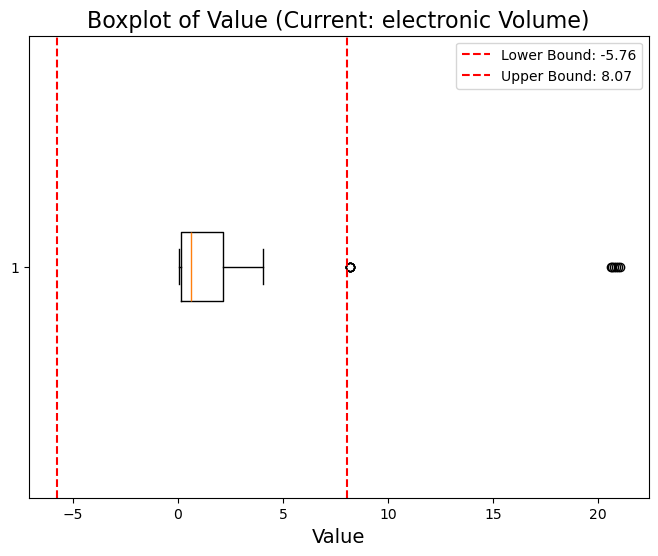

In [371]:
# Boxplot을 이용한 시각화
plt.figure(figsize=(8, 6))

# Boxplot 그리기
plt.boxplot(modbus_current['value'], vert=False)

# 이상치 기준선 추가
plt.axvline(x=lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(x=upper_bound, color='red', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')

# 제목과 레이블 추가
plt.title('Boxplot of Value (Current: electronic Volume)', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.legend()

# 출력
plt.show()

In [372]:
# value 컬럼에 대한 IQR 계산
Q1 = modbus_W['value'].quantile(0.25)
Q3 = modbus_W['value'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 기준 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 여부 확인
outliers = modbus_W[(modbus_W['value'] < lower_bound) | (modbus_W['value'] > upper_bound)]

filtered_W = modbus_W[(modbus_W['value'] >= lower_bound) & (modbus_W['value'] <= upper_bound)]


# 결과 출력
print(f"Q1 (1st Quartile): {Q1}")
print(f"Q3 (3rd Quartile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(outliers)


Q1 (1st Quartile): 7.0
Q3 (3rd Quartile): 405.0
IQR: 398.0
Lower Bound: -590.0
Upper Bound: 1002.0
      modbus_id modbus_name   value            timestamp
193         318           W  3502.0  2024-12-17 20:43:52
213         338           W  1509.0  2024-12-17 20:43:58
221         346           W  1509.0  2024-12-17 20:43:58
508         633           W  3646.0  2024-12-17 20:46:26
528         653           W  1509.0  2024-12-17 20:46:33
536         661           W  1509.0  2024-12-17 20:46:33
819         944           W  3608.0  2024-12-17 20:49:01
839         964           W  1510.0  2024-12-17 20:49:07
847         972           W  1510.0  2024-12-17 20:49:08
1136       1261           W  3601.0  2024-12-17 20:51:36
1156       1281           W  1509.0  2024-12-17 20:51:43
1164       1289           W  1509.0  2024-12-17 20:51:43
1449       1574           W  3608.0  2024-12-17 20:54:12
1469       1594           W  1507.0  2024-12-17 20:54:19
1477       1602           W  1507.0  2024-12-1

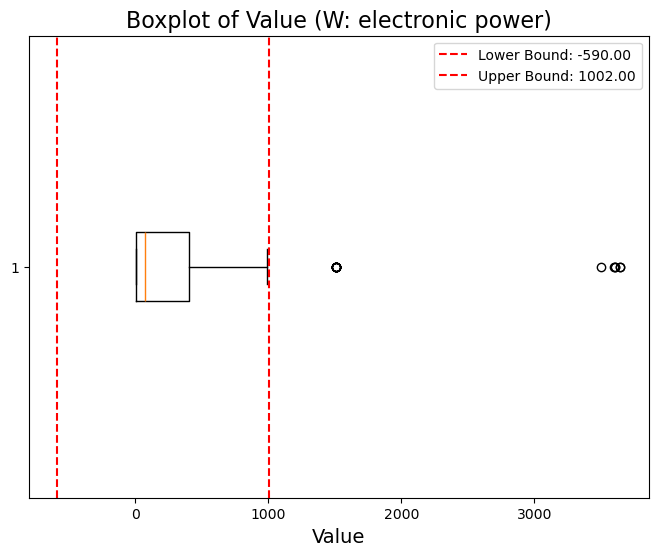

In [373]:
# Boxplot을 이용한 시각화
plt.figure(figsize=(8, 6))

# Boxplot 그리기
plt.boxplot(modbus_W['value'], vert=False)

# 이상치 기준선 추가
plt.axvline(x=lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(x=upper_bound, color='red', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')

# 제목과 레이블 추가
plt.title('Boxplot of Value (W: electronic power)', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.legend()

# 출력
plt.show()

In [374]:
corr_electric = modbus_current['value'].corr(modbus_W['value'])
# 상관관계 출력
print(f"Correlation between 'current' and 'W': {corr_electric:.2f}")

Correlation between 'current' and 'W': nan


In [375]:
Q1 = modbus_VAR['value'].quantile(0.25)
Q3 = modbus_VAR['value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = modbus_VAR[(modbus_VAR['value'] < lower_bound) | (modbus_VAR['value'] > upper_bound)]

filtered_VAR = modbus_VAR[(modbus_VAR['value'] >= lower_bound) & (modbus_VAR['value'] <= upper_bound)]


print(f"Q1 (1st Quartile): {Q1}")
print(f"Q3 (3rd Quartile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(outliers)


Q1 (1st Quartile): 1.0
Q3 (3rd Quartile): 69.0
IQR: 68.0
Lower Bound: -101.0
Upper Bound: 171.0
      modbus_id modbus_name   value            timestamp
195         320         VAR  1567.0  2024-12-17 20:43:52
204         329         VAR   439.0  2024-12-17 20:43:52
215         340         VAR   384.0  2024-12-17 20:43:58
223         348         VAR   384.0  2024-12-17 20:43:58
232         357         VAR   189.0  2024-12-17 20:44:04
240         365         VAR   189.0  2024-12-17 20:44:05
285         410         VAR   261.0  2024-12-17 20:44:29
293         418         VAR   261.0  2024-12-17 20:44:29
510         635         VAR  1418.0  2024-12-17 20:46:26
519         644         VAR   278.0  2024-12-17 20:46:27
530         655         VAR   384.0  2024-12-17 20:46:33
538         663         VAR   384.0  2024-12-17 20:46:33
547         672         VAR   189.0  2024-12-17 20:46:39
555         680         VAR   189.0  2024-12-17 20:46:39
600         725         VAR   261.0  2024-12-17 2

In [376]:
filtered_VAR.head()

,modbus_id,modbus_name,value,timestamp
3,128,VAR,1.0,2024-12-17 20:42:07
4,129,VAR,57.0,2024-12-17 20:42:07
11,136,VAR,1.0,2024-12-17 20:42:07
12,137,VAR,57.0,2024-12-17 20:42:07
20,145,VAR,1.0,2024-12-17 20:42:13


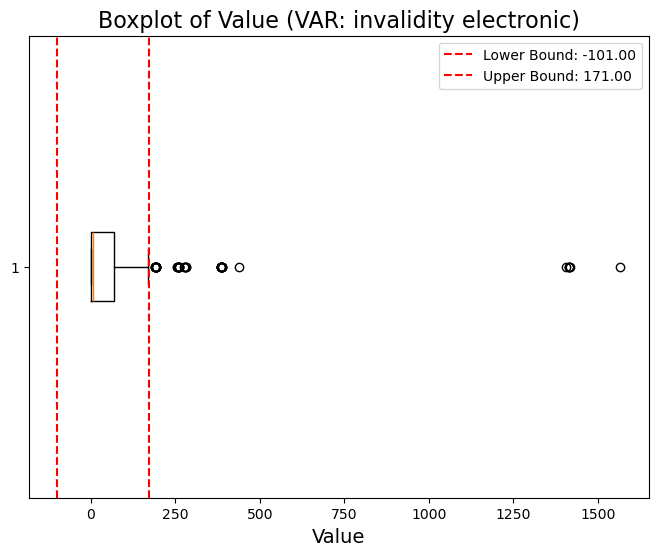

In [377]:
plt.figure(figsize=(8, 6))

plt.boxplot(modbus_VAR['value'], vert=False)

plt.axvline(x=lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(x=upper_bound, color='red', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')

plt.title('Boxplot of Value (VAR: invalidity electronic)', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.legend()

plt.show()

In [378]:
Q1 = modbus_VA['value'].quantile(0.25)
Q3 = modbus_VA['value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = modbus_VA[(modbus_VA['value'] < lower_bound) | (modbus_VA['value'] > upper_bound)]

filtered_VA = modbus_VA[(modbus_VA['value'] >= lower_bound) & (modbus_VA['value'] <= upper_bound)]


print(f"Q1 (1st Quartile): {Q1}")
print(f"Q3 (3rd Quartile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(outliers)


Q1 (1st Quartile): 38.0
Q3 (3rd Quartile): 480.0
IQR: 442.0
Lower Bound: -625.0
Upper Bound: 1143.0
      modbus_id modbus_name   value            timestamp
196         321          VA  4580.0  2024-12-17 20:43:52
216         341          VA  1812.0  2024-12-17 20:43:58
224         349          VA  1812.0  2024-12-17 20:43:59
511         636          VA  4649.0  2024-12-17 20:46:26
520         645          VA  1149.0  2024-12-17 20:46:27
531         656          VA  1814.0  2024-12-17 20:46:33
539         664          VA  1814.0  2024-12-17 20:46:33
822         947          VA  4614.0  2024-12-17 20:49:01
831         956          VA  1145.0  2024-12-17 20:49:02
842         967          VA  1812.0  2024-12-17 20:49:08
850         975          VA  1812.0  2024-12-17 20:49:08
1139       1264          VA  4599.0  2024-12-17 20:51:36
1159       1284          VA  1811.0  2024-12-17 20:51:43
1167       1292          VA  1811.0  2024-12-17 20:51:43
1452       1577          VA  4593.0  2024-12-

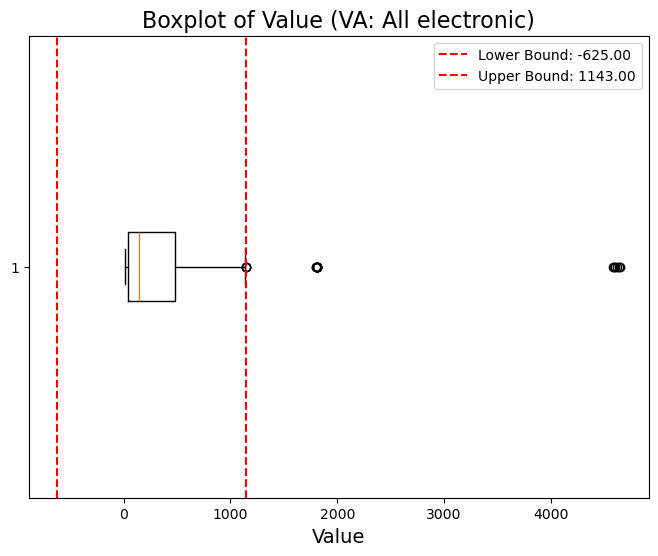

In [379]:
plt.figure(figsize=(8, 6))

plt.boxplot(modbus_VA['value'], vert=False)

plt.axvline(x=lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(x=upper_bound, color='red', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')

plt.title('Boxplot of Value (VA: All electronic)', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.legend()

plt.show()

### 상관관계(MODBUS)

In [380]:
corr_electric = modbus_current['value'].corr(modbus_VA['value'])
# 상관관계 출력
print(f"Correlation between 'current' and 'W': {corr_electric:.2f}")

Correlation between 'current' and 'W': nan


In [381]:
modbus_current['value'].describe()

count    90.000000
mean      2.771111
std       5.282834
min       0.050000
25%       0.170000
50%       0.645000
75%       2.145000
max      21.050000
Name: value, dtype: float64

In [382]:
modbus_W['value'].describe()

count     174.000000
mean      384.718391
std       741.029565
min         2.000000
25%         7.000000
50%        72.000000
75%       405.000000
max      3647.000000
Name: value, dtype: float64

In [383]:
pearson_corr = modbus_VA['value'].corr(modbus_W['value'])
print(pearson_corr)

nan


In [384]:
spearman_corr = modbus_VA['value'].corr(modbus_W['value'], method='spearman')
print(spearman_corr)

nan


In [385]:
mqtt_temperature['place'].unique()

array(['storage', 'hive', 'server_room', 'office', 'class_a',
       'meeting_room', 'pair_room', 'class_b'], dtype=object)

In [386]:
mqtt_temperature_entrance = mqtt_temperature[mqtt_temperature['spot'] == '입구']

In [387]:
pd.set_option('display.max_rows', None)  # 행 수 제한 해제
pd.set_option('display.max_columns', None)  # 열 수 제한 해제

## temperature와 humidity(온도와 습도)

In [388]:
mqtt_temperature.head()

,mqtt_id,measurement,place,spot,value,timestamp
0,1,temperature,storage,입구,18.5,2024-12-17 19:04:11
2,3,temperature,hive,정수기 위,25.0,2024-12-17 19:04:19
5,6,temperature,server_room,입구,24.6,2024-12-17 19:04:26
12,13,temperature,office,배전판 옆,25.0,2024-12-17 19:04:30
19,20,temperature,class_a,왼쪽 뒤,22.8,2024-12-17 19:04:42


In [389]:
mqtt_humidity.head()

,mqtt_id,measurement,place,spot,value,timestamp
1,2,humidity,storage,입구,23.0,2024-12-17 19:04:11
4,5,humidity,hive,정수기 위,20.5,2024-12-17 19:04:19
6,7,humidity,server_room,입구,19.0,2024-12-17 19:04:26
10,11,humidity,office,배전판 옆,21.0,2024-12-17 19:04:30
16,17,humidity,class_a,왼쪽 뒤,30.0,2024-12-17 19:04:42


In [390]:
mqtt_temperature['place'].unique()

array(['storage', 'hive', 'server_room', 'office', 'class_a',
       'meeting_room', 'pair_room', 'class_b'], dtype=object)

In [391]:
mqtt_humidity['place'].unique()

array(['storage', 'hive', 'server_room', 'office', 'class_a',
       'meeting_room', 'pair_room', 'class_b'], dtype=object)

In [392]:
# ['place']를 기준으로 병합
merged_df = pd.merge(
    mqtt_temperature, 
    mqtt_humidity, 
    on='place',  # 병합 기준
    suffixes=('_temp', '_humid')  # 중복된 열 이름에 접미사 추가
)

print(merged_df.head())
print(merged_df.columns)

results = {}
for location, group in merged_df.groupby('place'):
    if len(group) > 1: 
        correlation, _ = pearsonr(group['value_temp'], group['value_humid'])
        results[location] = correlation
    else:
        results[location] = None 

# 결과 출력
for location, correlation in results.items():
    print(f"Location: {location}, Correlation: {correlation}")


   mqtt_id_temp measurement_temp    place spot_temp  value_temp  \
0             1      temperature  storage        입구        18.5   
1             1      temperature  storage        입구        18.5   
2             1      temperature  storage        입구        18.5   
3             1      temperature  storage        입구        18.5   
4             1      temperature  storage        입구        18.5   

        timestamp_temp  mqtt_id_humid measurement_humid spot_humid  \
0  2024-12-17 19:04:11              2          humidity         입구   
1  2024-12-17 19:04:11             24          humidity         입구   
2  2024-12-17 19:04:11             47          humidity         입구   
3  2024-12-17 19:04:11             49          humidity         입구   
4  2024-12-17 19:04:11             75          humidity         입구   

   value_humid      timestamp_humid  
0         23.0  2024-12-17 19:04:11  
1         23.0  2024-12-17 19:05:11  
2         23.0  2024-12-17 19:06:11  
3         23.0  2024-12-

/tmp/ipykernel_85447/3974742266.py:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, _ = pearsonr(group['value_temp'], group['value_humid'])


In [393]:
merged_df.head()

,mqtt_id_temp,measurement_temp,place,spot_temp,value_temp,timestamp_temp,mqtt_id_humid,measurement_humid,spot_humid,value_humid,timestamp_humid
0,1,temperature,storage,입구,18.5,2024-12-17 19:04:11,2,humidity,입구,23.0,2024-12-17 19:04:11
1,1,temperature,storage,입구,18.5,2024-12-17 19:04:11,24,humidity,입구,23.0,2024-12-17 19:05:11
2,1,temperature,storage,입구,18.5,2024-12-17 19:04:11,47,humidity,입구,23.0,2024-12-17 19:06:11
3,1,temperature,storage,입구,18.5,2024-12-17 19:04:11,49,humidity,입구,23.0,2024-12-17 19:06:11
4,1,temperature,storage,입구,18.5,2024-12-17 19:04:11,75,humidity,입구,23.0,2024-12-17 19:07:11


/tmp/ipykernel_85447/2549134180.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Place', y='Correlation', data=correlation_df, palette='viridis')


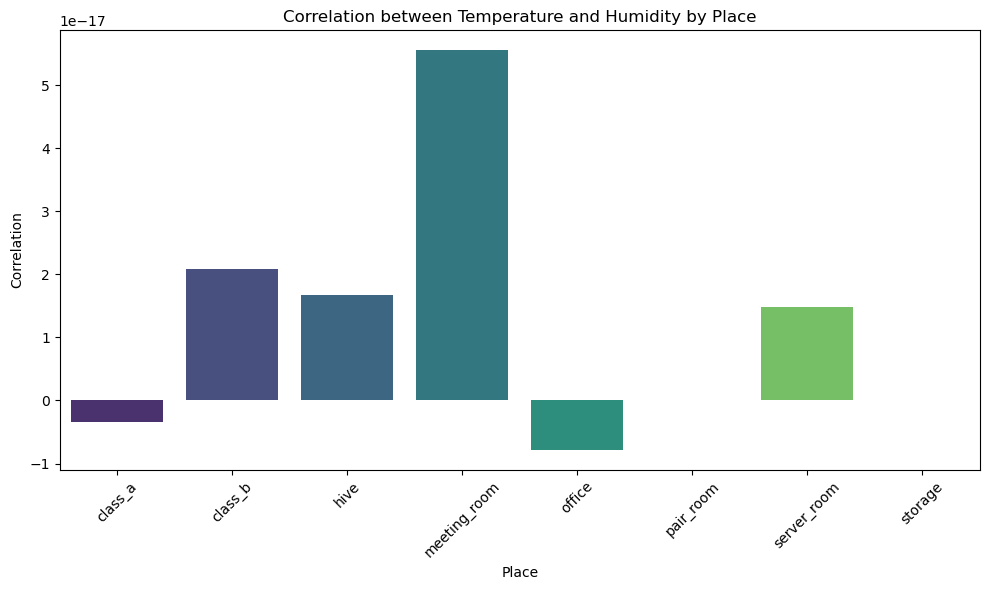

In [394]:
import seaborn as sns

# 상관관계 결과를 데이터프레임으로 변환
correlation_df = pd.DataFrame(list(results.items()), columns=['Place', 'Correlation'])

# 그래프 설정
plt.figure(figsize=(10, 6))
sns.barplot(x='Place', y='Correlation', data=correlation_df, palette='viridis')

# 그래프 꾸미기
plt.title('Correlation between Temperature and Humidity by Place')
plt.xlabel('Place')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()


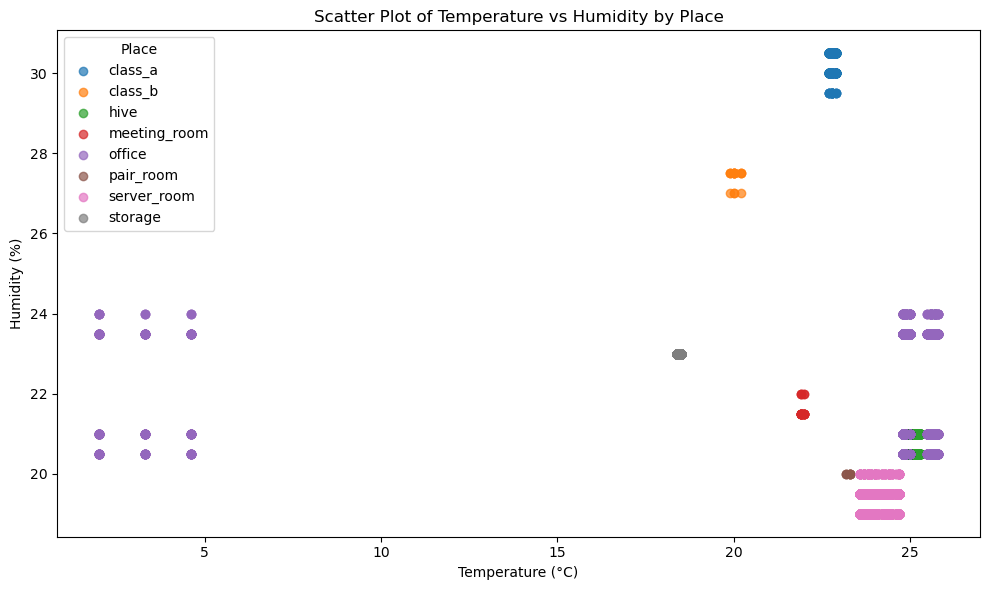

In [395]:
plt.figure(figsize=(10, 6))

# 장소별로 산점도 시각화
for location, group in merged_df.groupby('place'):
    plt.scatter(group['value_temp'], group['value_humid'], label=location, alpha=0.7)

# 그래프 꾸미기
plt.title('Scatter Plot of Temperature vs Humidity by Place')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend(title='Place')
plt.tight_layout()

# 그래프 출력
plt.show()

## CO2와 tvoc(공기질 관련)

In [396]:
mqtt_co2['place'].unique()

array(['class_a', 'office', 'class_b'], dtype=object)

In [397]:
mqtt_tvoc['place'].unique()

array(['class_b'], dtype=object)

In [398]:
merged_df_quality = pd.merge(
    mqtt_co2, 
    mqtt_tvoc, 
    on='place',
    suffixes=('_co2', '_tvoc')
)

In [399]:
merged_df_quality.head()

,mqtt_id_co2,measurement_co2,place,spot_co2,value_co2,timestamp_co2,mqtt_id_tvoc,measurement_tvoc,spot_tvoc,value_tvoc,timestamp_tvoc
0,168,co2,class_b,입구,1094.0,2024-12-17 19:09:48,161,tvoc,입구,253.0,2024-12-17 19:09:48
1,168,co2,class_b,입구,1094.0,2024-12-17 19:09:48,442,tvoc,입구,244.0,2024-12-17 19:19:48
2,168,co2,class_b,입구,1094.0,2024-12-17 19:09:48,449,tvoc,입구,244.0,2024-12-17 19:19:48
3,168,co2,class_b,입구,1094.0,2024-12-17 19:09:48,725,tvoc,입구,236.0,2024-12-17 19:29:48
4,438,co2,class_b,입구,1046.0,2024-12-17 19:19:48,161,tvoc,입구,253.0,2024-12-17 19:09:48


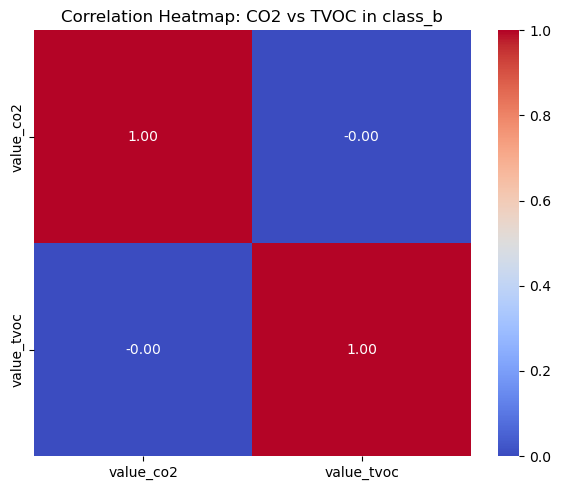

In [400]:
# 'class_b' 장소에서 CO2와 TVOC 데이터 필터링
class_b_data = merged_df_quality[merged_df_quality['place'] == 'class_b']

# CO2와 TVOC 간의 상관계수 매트릭스 계산
correlation_matrix = class_b_data[['value_co2', 'value_tvoc']].corr()

# 히트맵 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap: CO2 vs TVOC in class_b')
plt.tight_layout()
plt.show()


## CO2와 OCCUPANCY (재실 여부와 이산화탄소)

In [401]:
mqtt_co2['place'].unique()

array(['class_a', 'office', 'class_b'], dtype=object)

In [402]:
mqtt_occupancy['place'].unique()

array(['pair_room'], dtype=object)

## Illumination와 infrared(조도 관련)

In [403]:
mqtt_illumination['place'].unique()

array(['class_b'], dtype=object)

In [404]:
mqtt_infrared['place'].unique()

array(['class_b'], dtype=object)

In [405]:
merged_df_ligh = pd.merge(
    mqtt_illumination, 
    mqtt_infrared, 
    on='place',
    suffixes=('_illumination', '_infrared')
)

In [406]:
merged_df_ligh.head()

,mqtt_id_illumination,measurement_illumination,place,spot_illumination,value_illumination,timestamp_illumination,mqtt_id_infrared,measurement_infrared,spot_infrared,value_infrared,timestamp_infrared
0,165,illumination,class_b,입구,1.0,2024-12-17 19:09:48,160,infrared,입구,1.0,2024-12-17 19:09:48
1,165,illumination,class_b,입구,1.0,2024-12-17 19:09:48,441,infrared,입구,1.0,2024-12-17 19:19:48
2,165,illumination,class_b,입구,1.0,2024-12-17 19:09:48,443,infrared,입구,1.0,2024-12-17 19:19:48
3,165,illumination,class_b,입구,1.0,2024-12-17 19:09:48,726,infrared,입구,1.0,2024-12-17 19:29:48
4,439,illumination,class_b,입구,1.0,2024-12-17 19:19:48,160,infrared,입구,1.0,2024-12-17 19:09:48


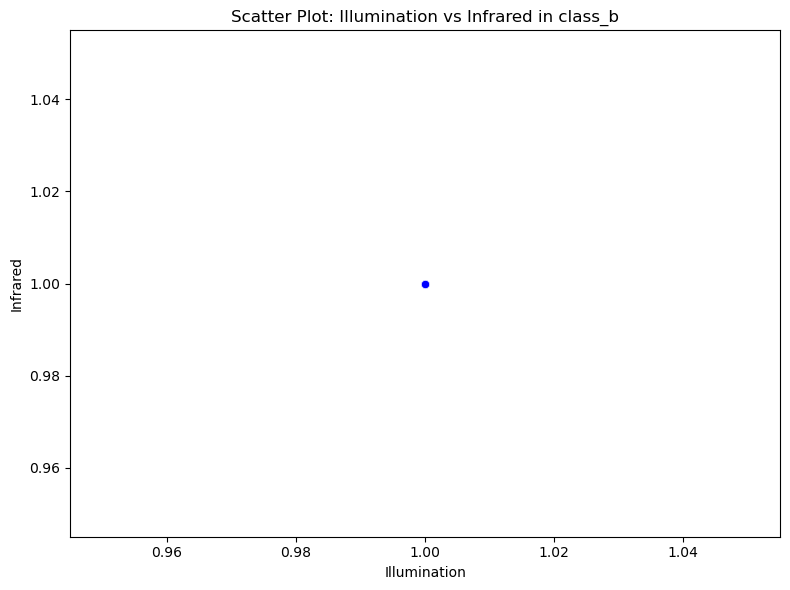

In [407]:
class_b_data = merged_df_ligh[merged_df_ligh['place'] == 'class_b']

correlation_matrix = class_b_data[['value_illumination', 'value_infrared']].corr()

class_b_data = merged_df_ligh[merged_df_ligh['place'] == 'class_b'].dropna(subset=['value_illumination', 'value_infrared'])


# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(x='value_illumination', y='value_infrared', data=class_b_data, color='blue', marker='o')
plt.title('Scatter Plot: Illumination vs Infrared in class_b')
plt.xlabel('Illumination')
plt.ylabel('Infrared')
plt.tight_layout()
plt.show()

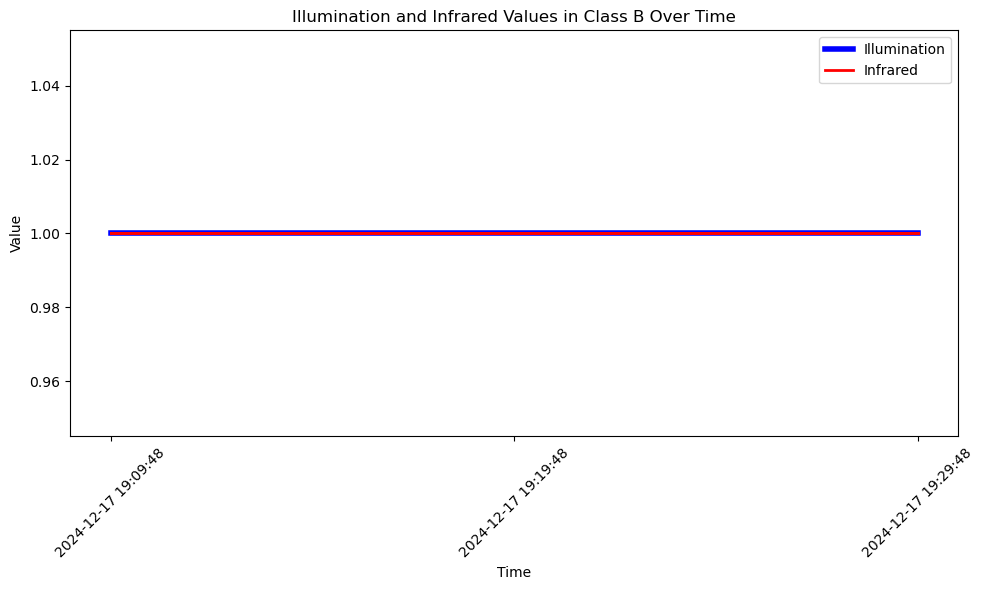

In [408]:
class_b_data = merged_df_ligh[merged_df_ligh['place'] == 'class_b']

class_b_data_clean = class_b_data.dropna(subset=['value_illumination', 'value_infrared'])

plt.figure(figsize=(10, 6))

plt.plot(class_b_data_clean['timestamp_illumination'], class_b_data_clean['value_illumination'], label='Illumination', color='blue', linewidth=4)
plt.plot(class_b_data_clean['timestamp_infrared'], class_b_data_clean['value_infrared'], label='Infrared', color='red', linewidth=2)

plt.title('Illumination and Infrared Values in Class B Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
